# F20DL - Group 17

## Short-listed Tabular Datasets:
1. **Pokémon for Data Mining and Machine Learning** - [Kaggle](https://www.kaggle.com/datasets/alopez247/pokemon)
    - <font color='#90ee90'> 721 entries and 23 attributes for each entry, a mix of nominal and numerical data. </font>
    - <font color='#90ee90'> There are only 2 attributes with over 50% null values, can be easily cleaned
    and still lots of other attributes </font>
    - <font color='#90ee90'> The dataset is 732Kb, so it does not use a lot of space. </font>
   <br></br>
2. **Netflix Movies and TV Shows** - [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
    - <font color='#90ee90'> Pros:  8807 records with 12 attributes coving all data types (nominal/ interval/ratio/ordinal data)</font>
    - <font color='#90ee90'> The dataset is 3.4MB.</font>
    - <font color='#FF7F7F'> 30% of records have null values for a certain attribute - field can be removed or records can be removed (leaving 6000 records) </font>
    <br></br>
3. **Video Game Sales** - [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales)
    - <font color='#90ee90'>The dataset is comprehensive which consist of 16500+ records</font>
    - <font color='#90ee90'>This is a well known dataset with lots of papers and code</font>
    - <font color='#FF7F7F'>Has a limited number of attributes</font>

## Short-listed Computer Vision Datasets

4. **Fruits 360** - [Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
    - <font color='#90ee90'>The dataset is comprehensive which consist of 90000+ high-quality images of over 100 different classes</font>
    - <font color='#90ee90'>The dataset consist of good quality, bad quality, and mixed quality fruit images</font>
    - <font color='#90ee90'>This is a well known dataset with lots of papers and code</font>
    - <font color='#90ee90'>The dataset has lots of training data which might result in better accuracy</font>
    - <font color='#FF7F7F'>The data might require GPUs for training due to the sheer size of the dataset</font>
    <br></br>
5. **Pokemon Image Dataset** - [Kaggle](https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)
    - <font color='#90ee90'>Has images of *all* of the Pokemon from generation 1 to 7</font>
    - <font color='#90ee90'>810 files/images to identify next evolution from the pre-evoled forms of the current Pokemon</font>
    - <font color='#90ee90'>Each Pokemon has two types, primary and secondary. The dataset helps predict the current type of the Pokemon image</font>
    - <font color='#FF7F7F'>Only 3 columns in the dataset, Pokemon, Type1, Type2</font>
    - <font color='#FF7F7F'>Type 2 has 50% null values, meaning half the Pokemons only have type1 which makes the identification pointless</font>
    - <font color='#FF7F7F'>Data is not uniform, the image resolutions are different which can result in conflicts during data analysis</font>


### Selected Dataset:
1. **Pokémon for Data Mining and Machine Learning** - [Kaggle](https://www.kaggle.com/datasets/alopez247/pokemon)
 - For nominal analysis
2. **Fruits 360** - [Kaggle](https://www.kaggle.com/datasets/moltean/fruits)
 - For any CNN related tasks.

In [1]:
import sys
assert sys.version_info >= (3,5)    # Python >= 3.5 is required

In [2]:
import sklearn
assert sklearn.__version__ >= "0.2"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
pokemon = pd.read_csv('pokemon_alopez247.csv')
pokemon.head()      #This displays the top 5 entries, showing the 23 attributes

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


This database includes 21 variables per each of the 721 Pokémon of the first six generations, plus the Pokémon ID and its name. These variables are briefly described next:

- **Number**: Pokémon ID in the Pokédex.
- **Name**: Name of the Pokémon.
- **Type_1**: Primary type.
- **Type_2**: Second type, in case the Pokémon has it.
- **Total**: Sum of all the base stats (Health Points, Attack, Defense, Special Attack, Special Defense, and Speed).
- **HP**: Base Health Points.
- **Attack**: Base Attack.
- **Defense**: Base Defense.
- **Sp_Atk**: Base Special Attack.
- **Sp_Def**: Base Special Defense.
- **Speed**: Base Speed.
- **Generation**: Number of the generation when the Pokémon was introduced.
- **isLegendary**: Boolean that indicates whether the Pokémon is Legendary or not.
- **Color**: Color of the Pokémon according to the Pokédex.
- **hasGender**: Boolean that indicates if the Pokémon can be classified as female or male.
- **Pr_male**: In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value.
- **EggGroup1**: Egg Group of the Pokémon.
- **EggGroup2**: Second Egg Group of the Pokémon, in case it has two.
- **hasMegaEvolution**: Boolean that indicates whether the Pokémon is able to Mega-evolve or not.
- **Height_m**: Height of the Pokémon, in meters.
- **Weight_kg**: Weight of the Pokémon, in kilograms.
- **Catch_Rate**: Catch Rate.
- **Body_Style**: Body Style of the Pokémon according to the Pokédex.

In [4]:
pokemon.info()
#Almost half of the Type_2 attributes are null, this is because Type 2
#is not a required attribute like Type_1 and is an optional add-on.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [5]:
# Generating a statistical summary of the pokeman data
pokemon.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<AxesSubplot:>

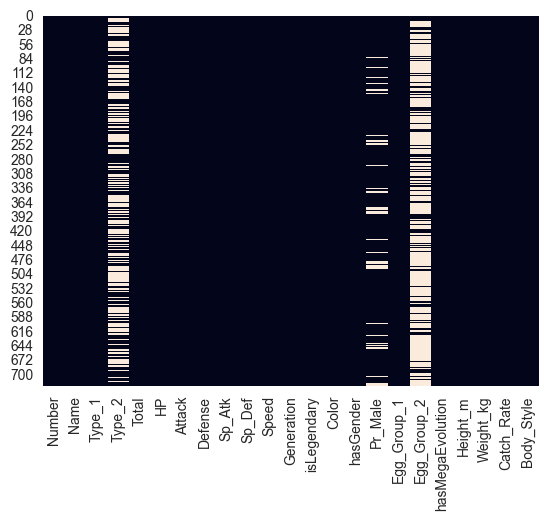

In [6]:
sns.heatmap(pokemon.isnull(), cbar=False)

**Dealing with Null values:**
1. *Type_2* has around 50% null values as some Pokemons do not have a second type. Removing all the rows with this as null would reduce our dataset to 50% of the size. Removing this column ends the possibility of identifying and analysising the Pokemon's second type. Replacing this as a string called "None" solves our problem.

2. *Egg_Group_2* has around 75% null value as some Pokemons have only one egg group. Removing all the rows with this as null would reduce our dataset to 25% of the size. Removing this column again ends the possibility of indentifying and analysising the Pokemon's second egg group. Replacing this as a string called "None" solves our problem.

3. *Pr_Male* has around 11% null values, these Pokemons do not have a gender. Removing these rows or columns will cost us the possibility of identifying and predicting the Pokemon's gender. Replacing this with 999 signifies as the Pokemon as genderless.

In [7]:
# dealing with null values 

# changing null values of Type_2 to string "None"
pokemon['Type_2'].fillna("None", inplace = True)
# changing null values of Egg_Group_2 to string "None"
pokemon['Egg_Group_2'].fillna("None", inplace = True)
# changing null values of Pr_Male to 999
pokemon['Pr_Male'].fillna(999, inplace = True)

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            721 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

<AxesSubplot:>

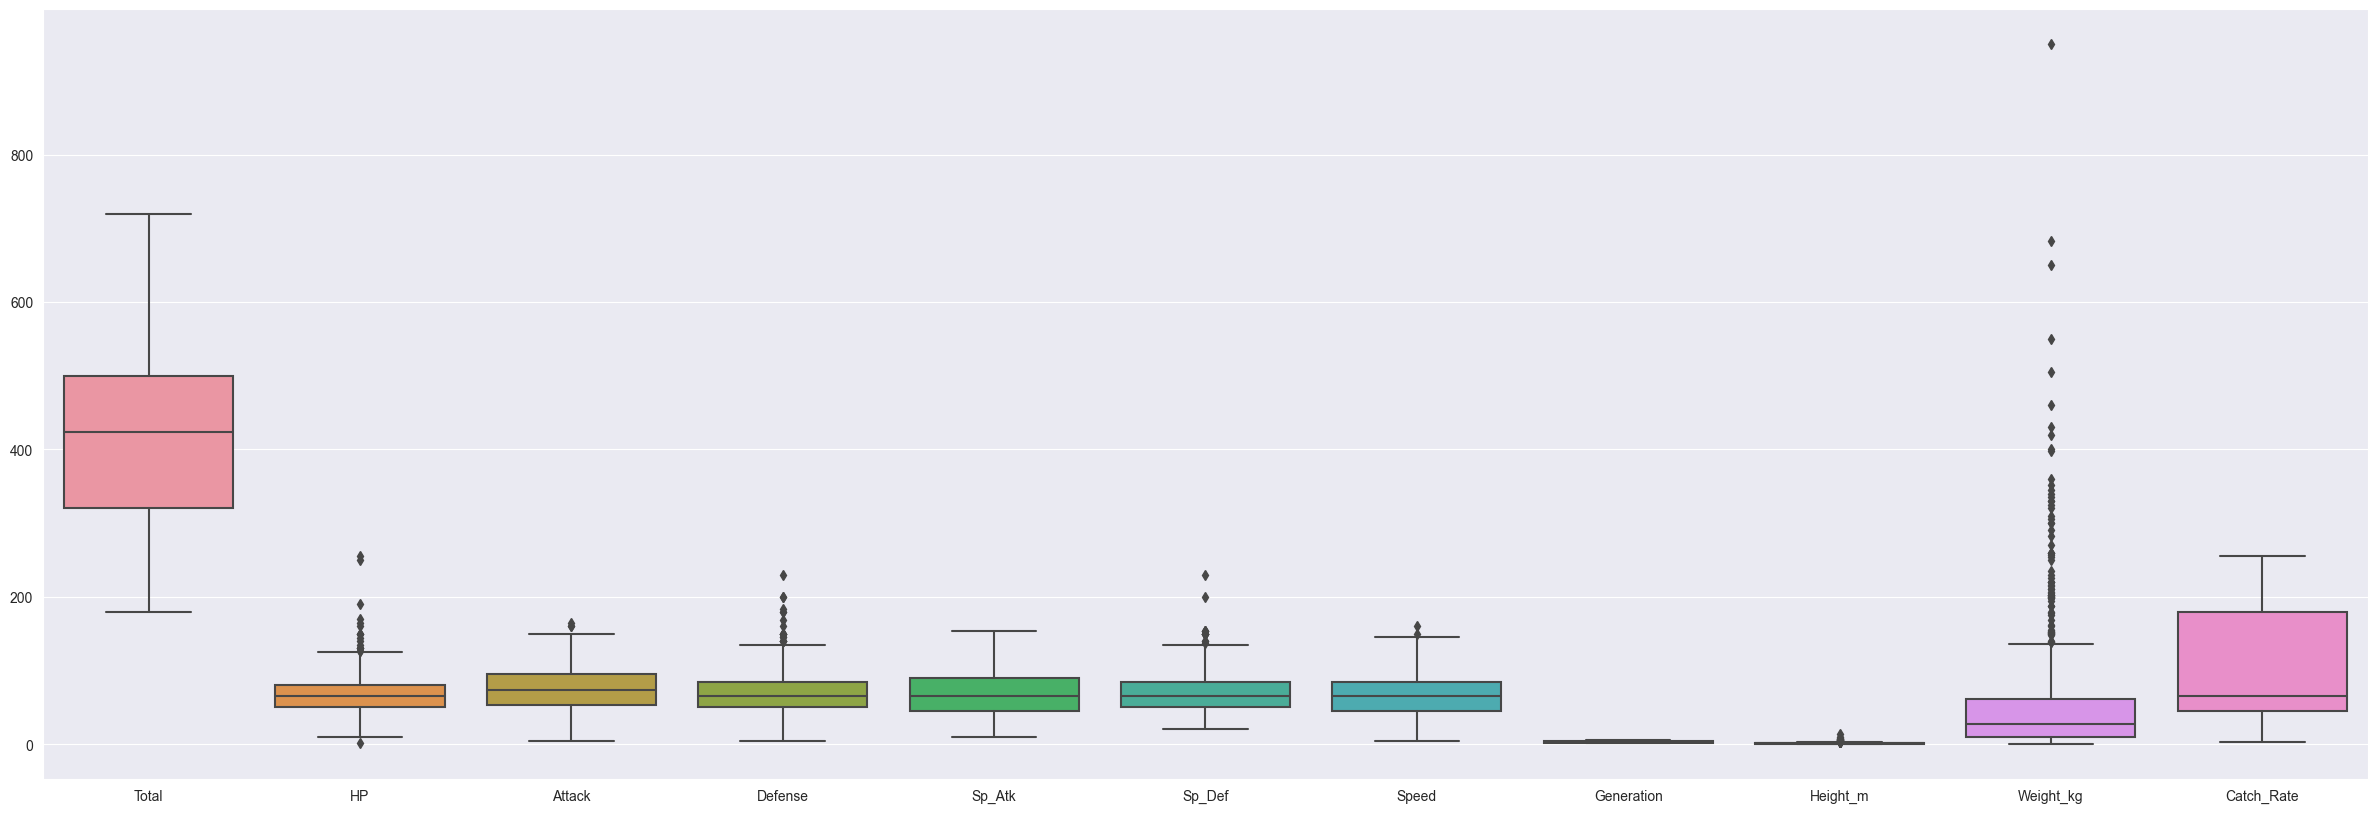

In [8]:
plt.figure(figsize = (30, 10))
# All numerical data
num_data = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Height_m', 'Weight_kg', 'Catch_Rate']]
#Generating a box plot to visualize the statistical summary 
sns.boxplot(data = num_data)

### Dealing with Categorical Data:


In [9]:
#The data before:
categorical_attributes = ['Type_1', 'Type_2', 'Egg_Group_1', 'Egg_Group_2', 'Color', 'Body_Style', 'isLegendary', 'hasMegaEvolution', 'hasGender']
pokemon[categorical_attributes].head()

,Type_1,Type_2,Egg_Group_1,Egg_Group_2,Color,Body_Style,isLegendary,hasMegaEvolution,hasGender
0,Grass,Poison,Monster,Grass,Green,quadruped,False,False,True
1,Grass,Poison,Monster,Grass,Green,quadruped,False,False,True
2,Grass,Poison,Monster,Grass,Green,quadruped,False,True,True
3,Fire,None,Monster,Dragon,Red,bipedal_tailed,False,False,True
4,Fire,None,Monster,Dragon,Red,bipedal_tailed,False,False,True


In [10]:
#Changing the Categorical Data to numbers.
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
pokemon[categorical_attributes] = enc.fit_transform(pokemon[categorical_attributes]).astype(int)

In [11]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    int64  
 3   Type_2            721 non-null    int64  
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    int64  
 13  Color             721 non-null    int64  
 14  hasGender         721 non-null    int64  
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    int64  
 1

In [12]:
#The data after:
pokemon[categorical_attributes].head()

,Type_1,Type_2,Egg_Group_1,Egg_Group_2,Color,Body_Style,isLegendary,hasMegaEvolution,hasGender
0,9,14,10,6,3,9,0,0,1
1,9,14,10,6,3,9,0,0,1
2,9,14,10,6,3,9,0,1,1
3,6,12,10,2,7,0,0,0,1
4,6,12,10,2,7,0,0,0,1


### Dealing with Normalization

In [13]:
from sklearn import preprocessing

pokemon_copy = pokemon.copy().drop('Name', axis=1)
numeric_attributes = pokemon_copy.columns.tolist()

min_max_scaler = preprocessing .MinMaxScaler()
pokemon[numeric_attributes] = min_max_scaler.fit_transform(pokemon[numeric_attributes])

pokemon.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,0.000000,Bulbasaur,0.529412,0.777778,0.255556,0.173228,0.27500,0.195556,0.381944,0.214286,...,0.333333,1.0,0.000876,0.714286,0.461538,0.0,0.042361,0.007159,0.166667,0.692308
1,0.001389,Ivysaur,0.529412,0.777778,0.416667,0.232283,0.35625,0.257778,0.486111,0.285714,...,0.333333,1.0,0.000876,0.714286,0.461538,0.0,0.061806,0.013580,0.166667,0.692308
2,0.002778,Venusaur,0.529412,0.777778,0.638889,0.311024,0.48125,0.346667,0.625000,0.380952,...,0.333333,1.0,0.000876,0.714286,0.461538,1.0,0.132639,0.105169,0.166667,0.692308
3,0.004167,Charmander,0.352941,0.666667,0.238889,0.149606,0.29375,0.168889,0.347222,0.142857,...,0.777778,1.0,0.000876,0.714286,0.153846,0.0,0.035417,0.008843,0.166667,0.000000
4,0.005556,Charmeleon,0.352941,0.666667,0.416667,0.224409,0.36875,0.235556,0.486111,0.214286,...,0.777778,1.0,0.000876,0.714286,0.153846,0.0,0.068750,0.019897,0.166667,0.000000


### Dealing with Normalization

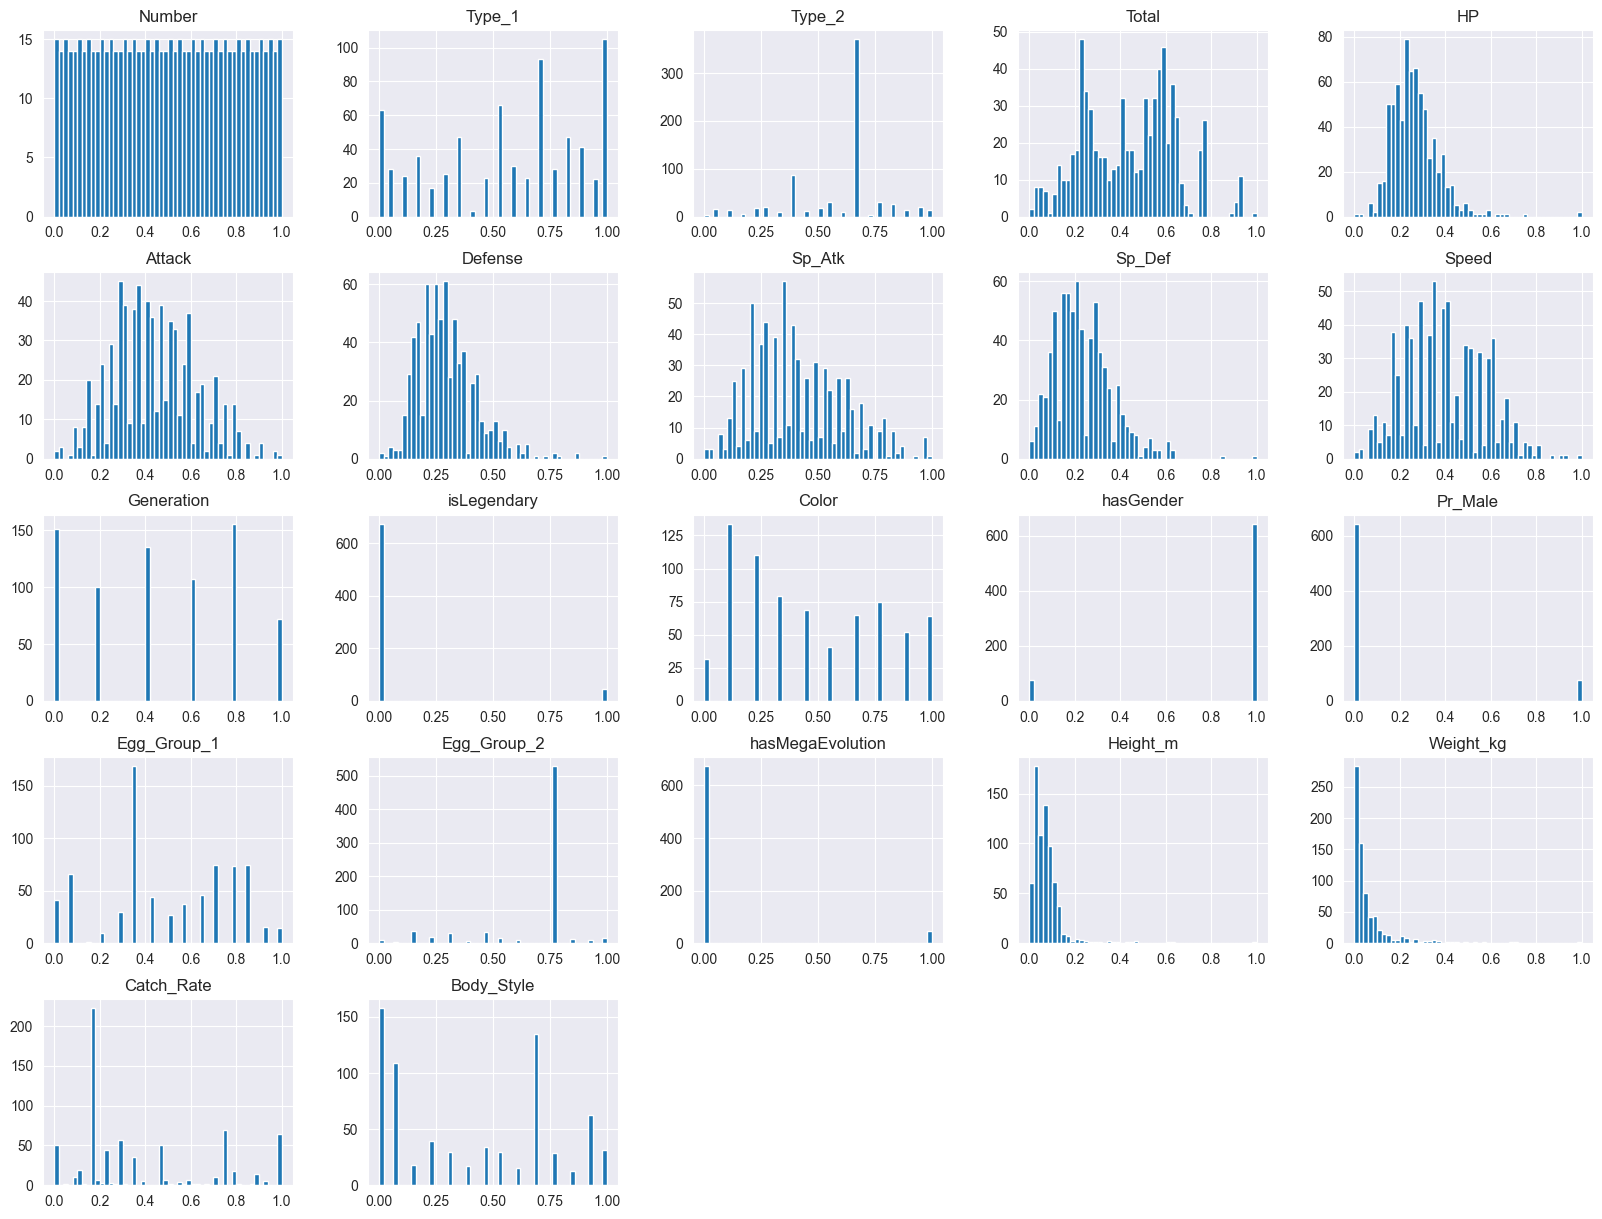

In [14]:
from sklearn import preprocessing

numeric_attributes = ['Type_1', 'Type_2','Total','HP','Attack','Defense','Sp_Atk','Sp_Def', 'Egg_Group_1', 'Egg_Group_2', 'Color','Height_m','Weight_kg','Catch_Rate', 'Body_Style']

min_max_scaler = preprocessing .MinMaxScaler()
pokemon[numeric_attributes] = min_max_scaler.fit_transform(pokemon[numeric_attributes])
#Catch_Rate , 
#we dont need the weight and height.
pokemon.head()

<AxesSubplot:>

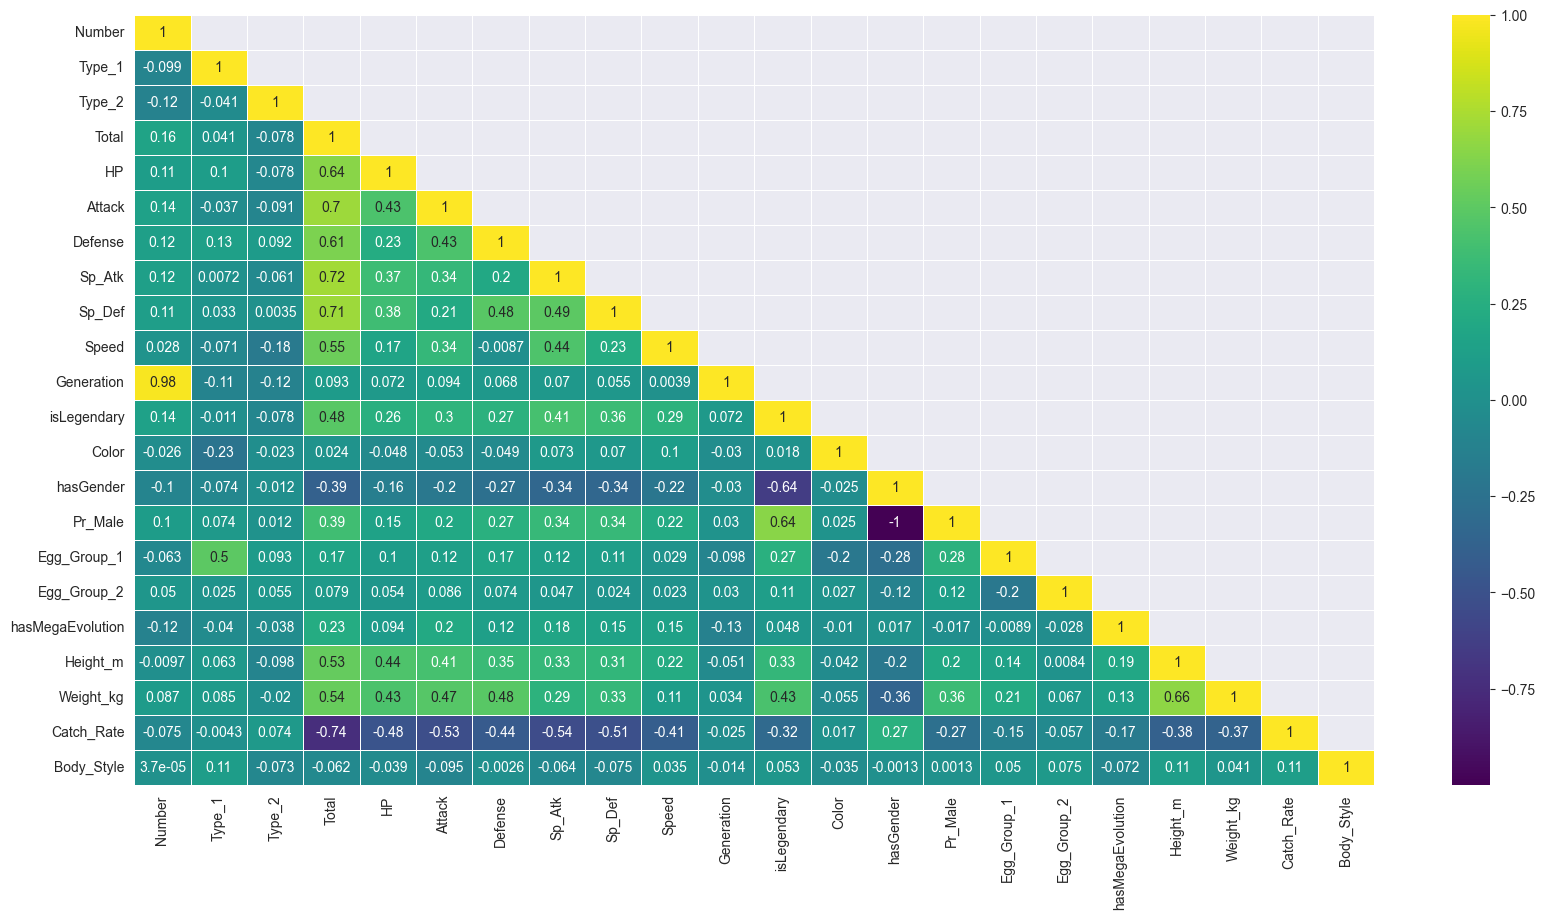

In [15]:
# Plotting the correlation matrix
mask = np.array(pokemon.corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(pokemon.corr(), mask = mask, annot=True, cmap='viridis', linewidths=.5)

In [18]:
corr_matrix = pokemon.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
top_corr = corr_matrix["isLegendary"].sort_values(ascending=False)
top_corr = top_corr.sort_values(ascending=False).drop('Number')
top_corr

isLegendary         1.000000
Pr_Male             0.644736
Total               0.481837
Weight_kg           0.425219
Sp_Atk              0.409739
Sp_Def              0.360215
Height_m            0.326323
Attack              0.302786
Speed               0.286082
Defense             0.274446
Egg_Group_1         0.271078
HP                  0.258926
Egg_Group_2         0.111683
Generation          0.071875
Body_Style          0.052852
hasMegaEvolution    0.047955
Color               0.018150
Type_1             -0.010503
Type_2             -0.078308
Catch_Rate         -0.319302
hasGender          -0.644714
Name: isLegendary, dtype: float64

array([[<AxesSubplot:xlabel='isLegendary', ylabel='isLegendary'>,
        <AxesSubplot:xlabel='Pr_Male', ylabel='isLegendary'>,
        <AxesSubplot:xlabel='Total', ylabel='isLegendary'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='isLegendary'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='isLegendary'>],
       [<AxesSubplot:xlabel='isLegendary', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Pr_Male', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Total', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='Pr_Male'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='Pr_Male'>],
       [<AxesSubplot:xlabel='isLegendary', ylabel='Total'>,
        <AxesSubplot:xlabel='Pr_Male', ylabel='Total'>,
        <AxesSubplot:xlabel='Total', ylabel='Total'>,
        <AxesSubplot:xlabel='Weight_kg', ylabel='Total'>,
        <AxesSubplot:xlabel='Sp_Atk', ylabel='Total'>],
       [<AxesSubplot:xlabel='isLegendary', ylabel='Weight_kg'>,
        <AxesSubplot:xlabel='Pr_Male', ylabe

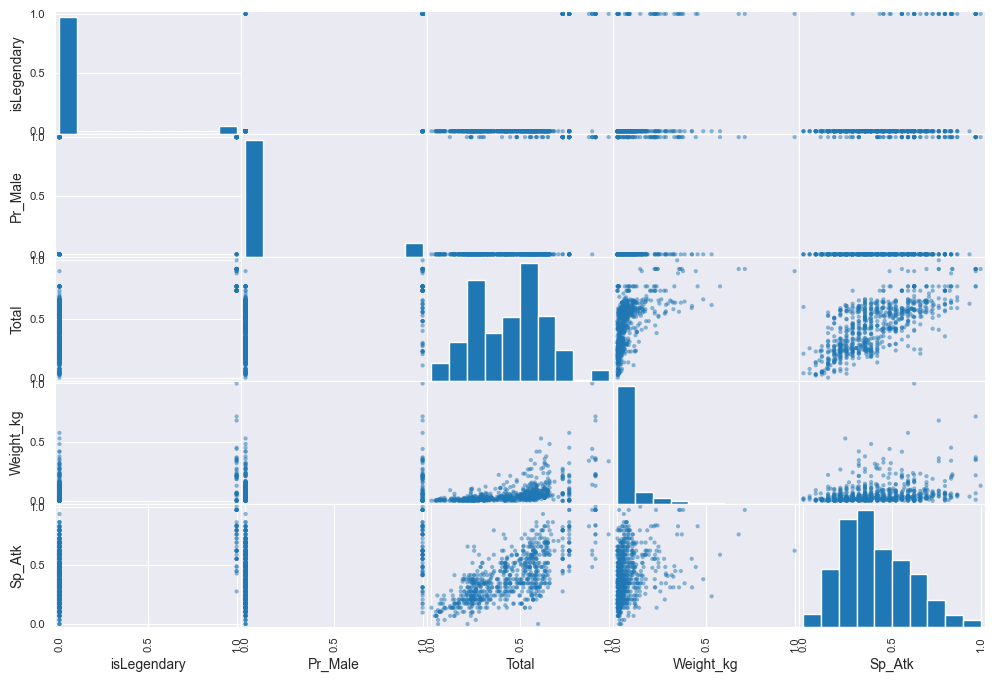

In [19]:
from pandas.plotting import scatter_matrix

attributes = top_corr.index[:5].tolist()
scatter_matrix(pokemon[attributes], figsize=(12, 8))

### Most correlating subsets of the dataset

In [23]:
pokemon_1 = pokemon[top_corr.index[:5].tolist()]
pokemon_2 = pokemon[top_corr.index[:7].tolist()]
pokemon_3 = pokemon[top_corr.index[:10].tolist()]

print(pokemon_1.columns.to_list())
print(pokemon_2.columns.to_list())
print(pokemon_3.columns.to_list())

['isLegendary', 'Pr_Male', 'Total', 'Weight_kg', 'Sp_Atk']
['isLegendary', 'Pr_Male', 'Total', 'Weight_kg', 'Sp_Atk', 'Sp_Def', 'Height_m']
['isLegendary', 'Pr_Male', 'Total', 'Weight_kg', 'Sp_Atk', 'Sp_Def', 'Height_m', 'Attack', 'Speed', 'Defense']


array([[<AxesSubplot:xlabel='Generation', ylabel='Generation'>,
        <AxesSubplot:xlabel='hasMegaEvolution', ylabel='Generation'>,
        <AxesSubplot:xlabel='Type_2', ylabel='Generation'>,
        <AxesSubplot:xlabel='Type_1', ylabel='Generation'>,
        <AxesSubplot:xlabel='Egg_Group_1', ylabel='Generation'>],
       [<AxesSubplot:xlabel='Generation', ylabel='hasMegaEvolution'>,
        <AxesSubplot:xlabel='hasMegaEvolution', ylabel='hasMegaEvolution'>,
        <AxesSubplot:xlabel='Type_2', ylabel='hasMegaEvolution'>,
        <AxesSubplot:xlabel='Type_1', ylabel='hasMegaEvolution'>,
        <AxesSubplot:xlabel='Egg_Group_1', ylabel='hasMegaEvolution'>],
       [<AxesSubplot:xlabel='Generation', ylabel='Type_2'>,
        <AxesSubplot:xlabel='hasMegaEvolution', ylabel='Type_2'>,
        <AxesSubplot:xlabel='Type_2', ylabel='Type_2'>,
        <AxesSubplot:xlabel='Type_1', ylabel='Type_2'>,
        <AxesSubplot:xlabel='Egg_Group_1', ylabel='Type_2'>],
       [<AxesSubplot:xlabel='G

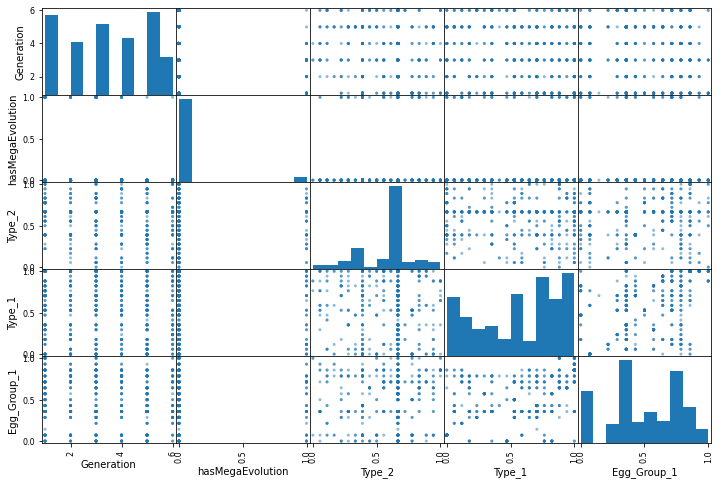

In [18]:
from pandas.plotting import scatter_matrix

attributes = top_corr.index[:5].tolist()
scatter_matrix(pokemon[attributes], figsize=(12, 8))